## Notebook to visualize new datatables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sqlite3
from sqlite3 import Error

pd.options.mode.chained_assignment = None # not to get SettingWithCopyWarning

## Function to use

In [2]:
def read_data_from_sql(db_path=str, tickers=list, statements=['income_statement', 'balance_sheet']):
   # create connection
    connection = None
    try:
        connection = sqlite3.connect(db_path)
        print("Connection to SQLite DB successful!")
    except Error as e:
        print(f"The error '{e}' occurred.")
    # read sql tables into DataFrame
    df_list = []
    for ticker in tickers:
        if 'income_statement' in statements and 'balance_sheet' in statements:
            df_is = pd.read_sql_query(
                "SELECT * FROM income_statement WHERE ticker = '{}'".format(ticker),
                con=connection
            )
            df_bs = pd.read_sql_query(
                "SELECT * FROM balance_sheet WHERE ticker = '{}'".format(ticker),
                con=connection
            )
            # merge and andd to list
            merged_df = pd.merge(df_is, df_bs, on=['end', 'form', 'cik', 'ticker'])
            df_list.append(merged_df)
            # print missing data
            if len(df_is) == 0 or len(df_bs) == 0:
                print("{} has missing statements!".format(ticker))
        elif 'income_statement' in statements:
            df_is = pd.read_sql_query(
                "SELECT * FROM {} WHERE ticker = '{}'".format(statements[0], ticker),
                con=connection
            )
            # add to list
            df_list.append(df_is)
            # print missing statement
            if len(df_is) == 0:
                print("{} has no income statement!".format(ticker))
        elif 'balance_sheet' in statements:
            df_bs = pd.read_sql_query(
                "SELECT * FROM {} WHERE ticker = '{}'".format(statements[0], ticker),
                con=connection
            )
            # add to list
            df_list.append(df_bs)
            # print missing list
            if len(df_bs) == 0:
                print("{} has no balance sheet!".format(ticker))
        else:
            print('Only IS, BS or both report are available!')
    # concat list of DataFrames
    result = pd.concat(df_list)
    if len(result) > 0:
        print('Data has been collected!')

    # set datatype in DataFrame
    for column in result.columns:
        if column in ['end']:
            result['end'] = pd.to_datetime(result['end'])
        elif column not in ['cik', 'ticker', 'form', 'end']:
            result[column] = result[column].astype(float)
    print('Datatype has been updated!')

    connection.close()
    print('Connection closed!')

    return result


# 1. Load & Visualize data

In [3]:
# database path
db_path = '../database/statements.db'
# loader function
data = read_data_from_sql(
    db_path=db_path,
    tickers=['BG'],
    statements=['income_statement', 'balance_sheet']    
)

Connection to SQLite DB successful!
Data has been collected!
Datatype has been updated!
Connection closed!


In [4]:
form = '10-Q'
start_date = pd.Timestamp('2001-01-01')
# filtered DataFrame
data_filt = data.loc[(data['form'] == form) & (data['end'] > start_date), :]
data_filt.reset_index(drop=True, inplace=True)

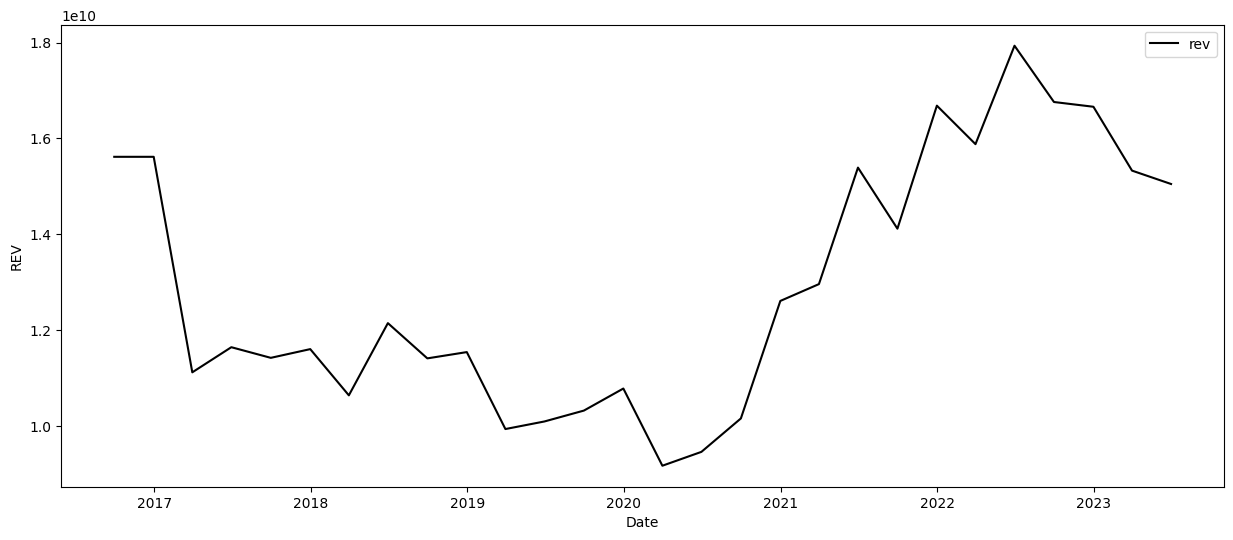

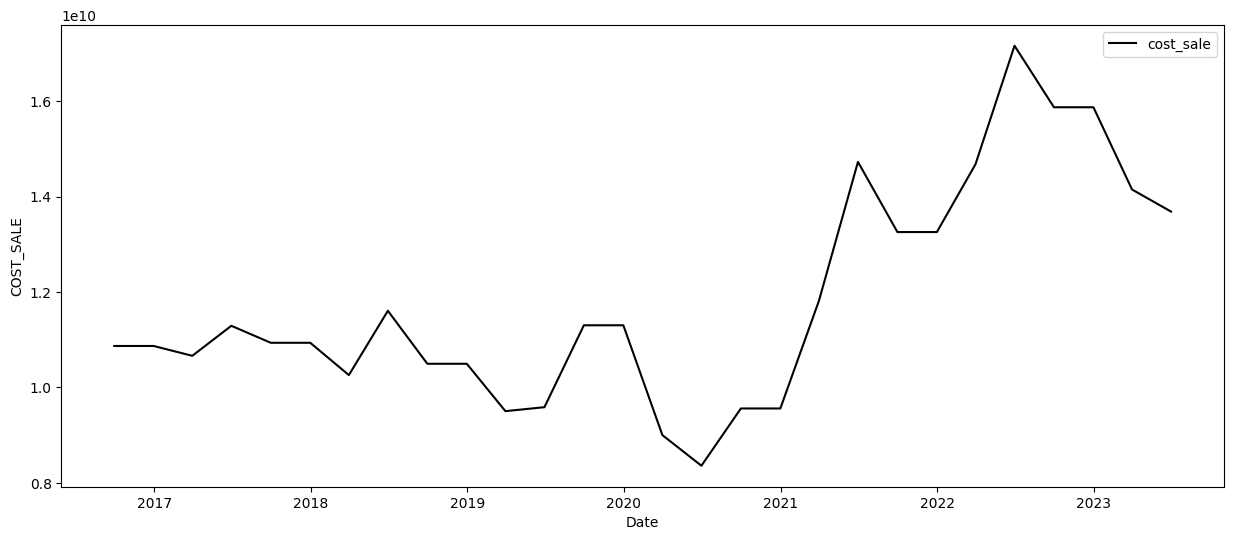

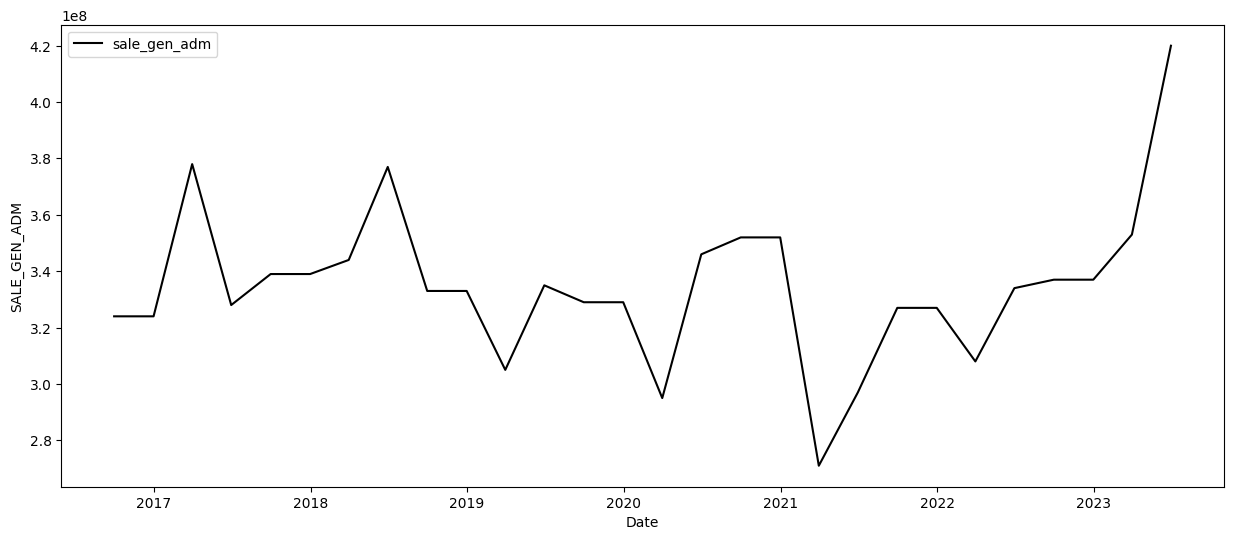

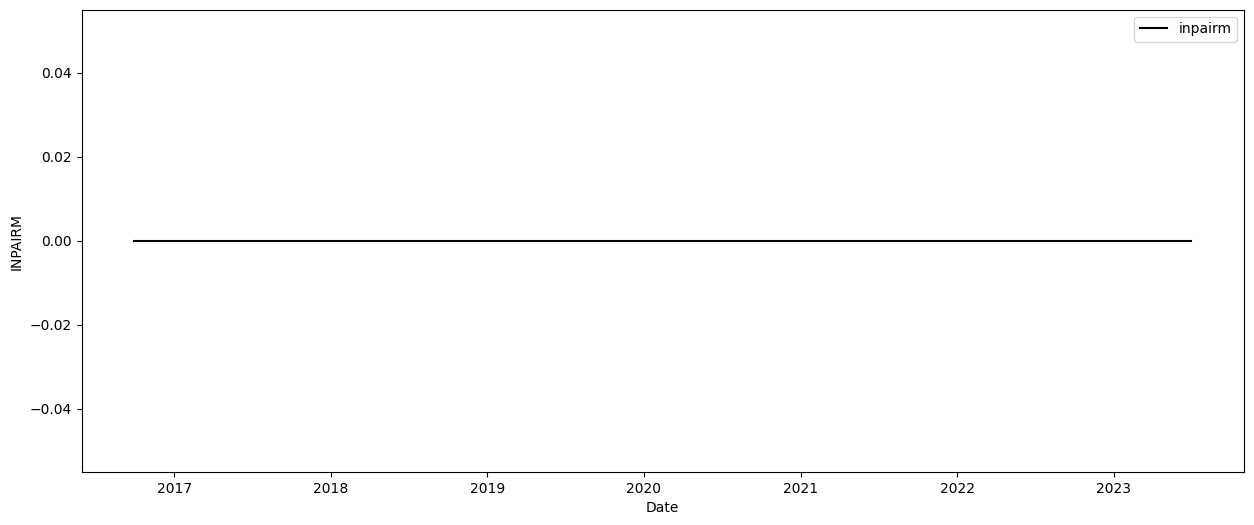

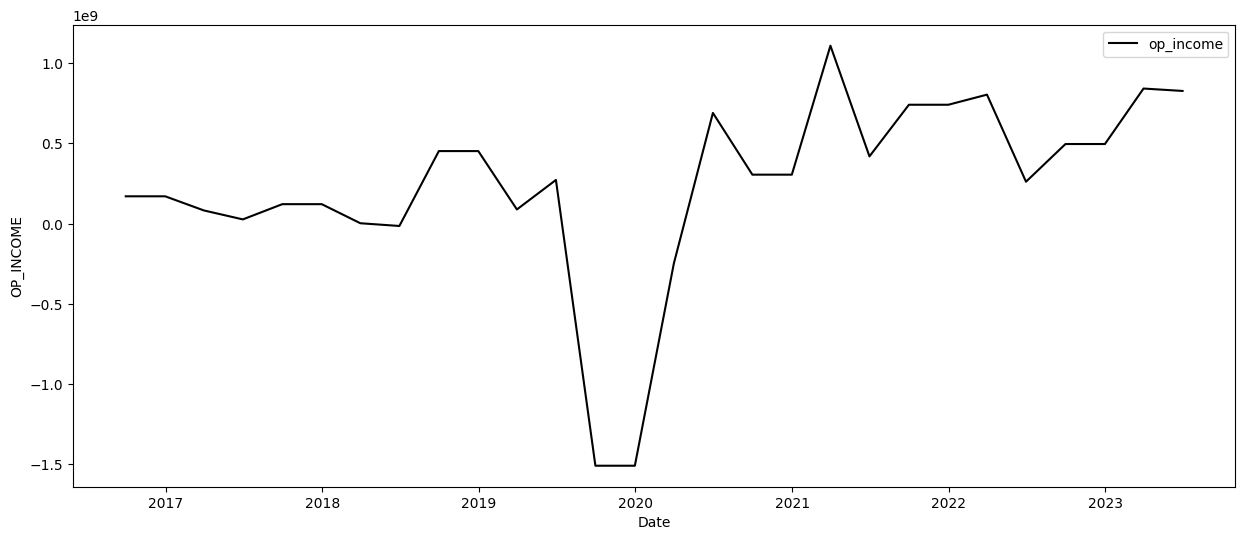

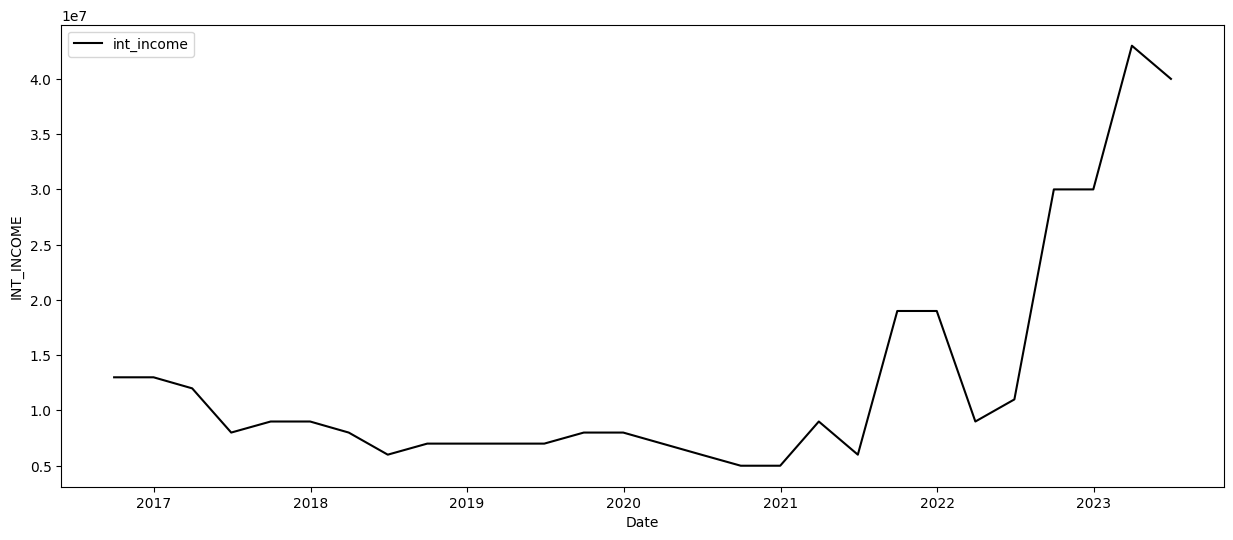

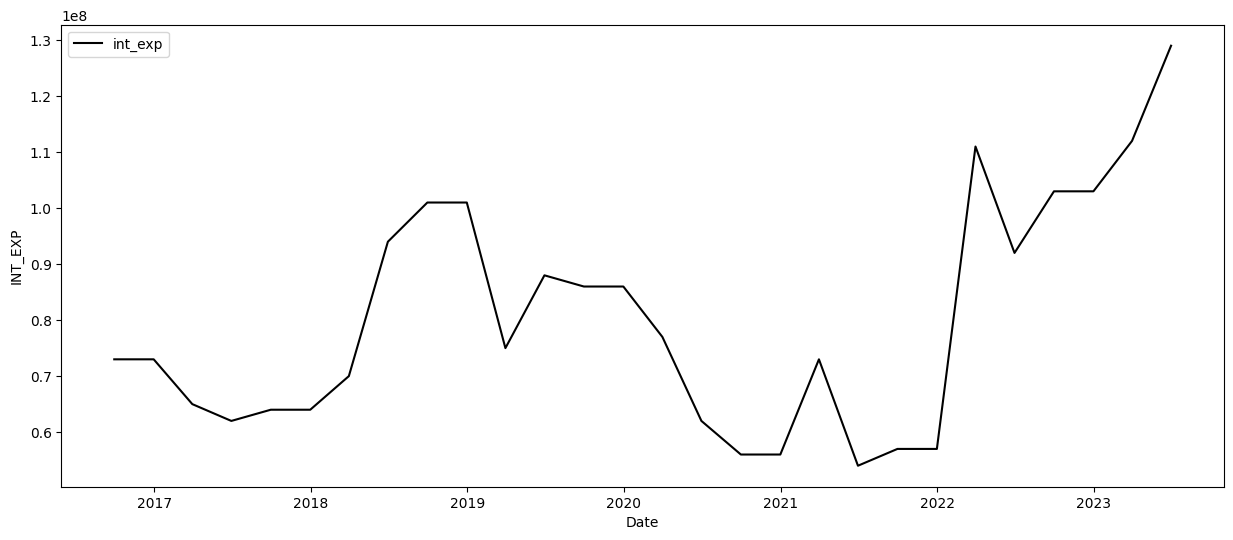

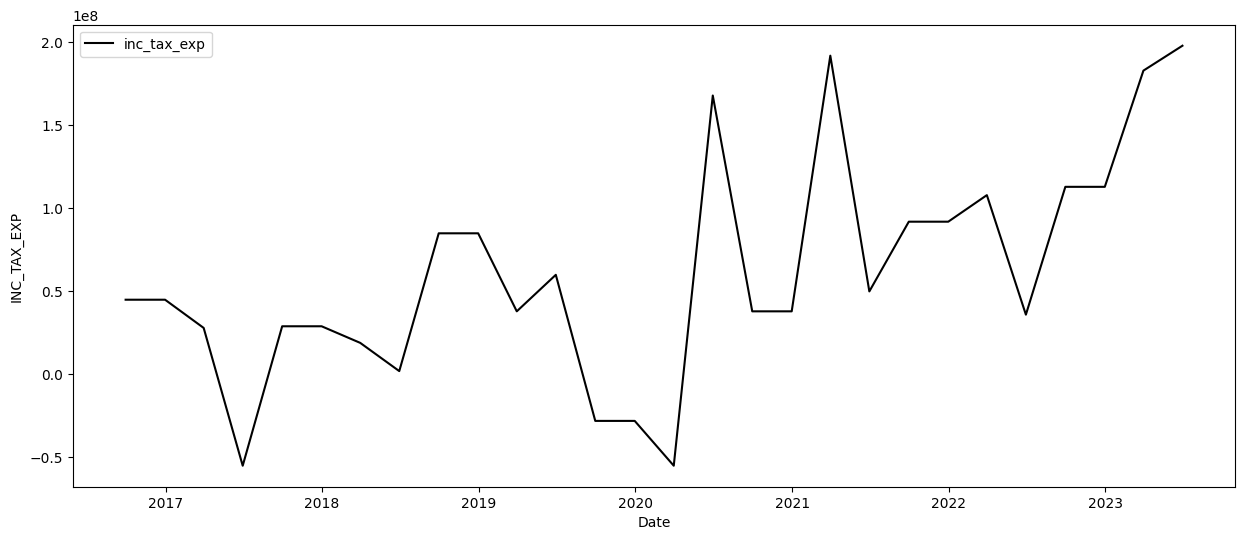

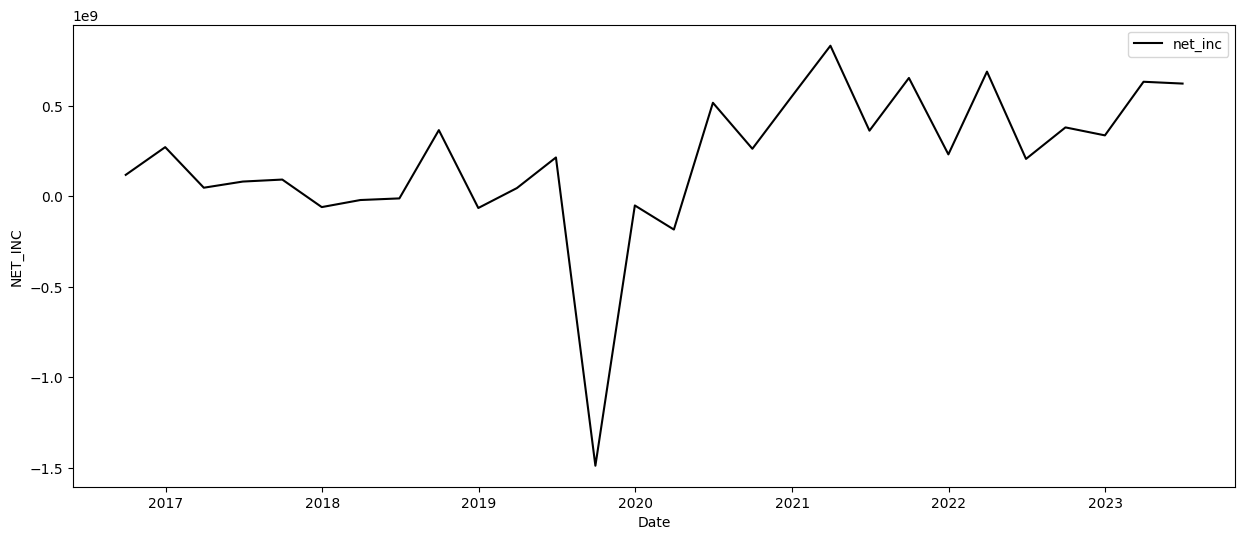

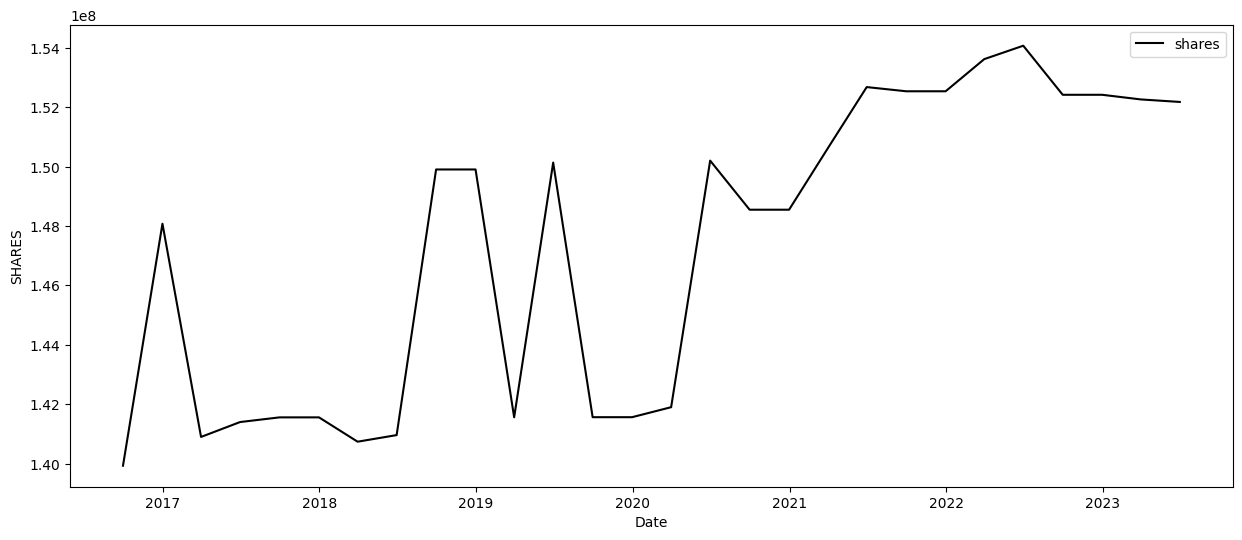

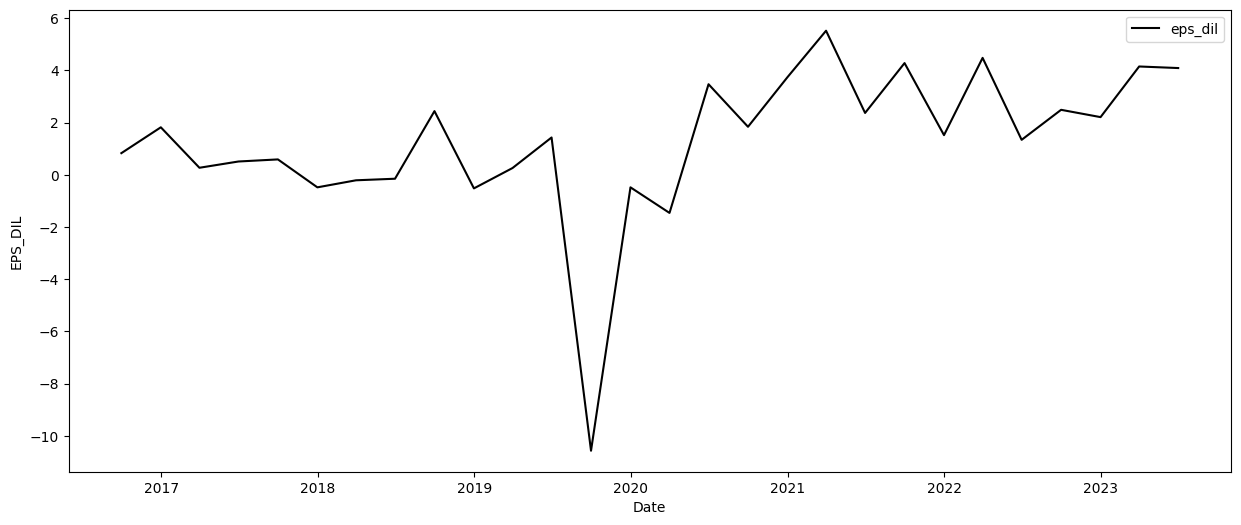

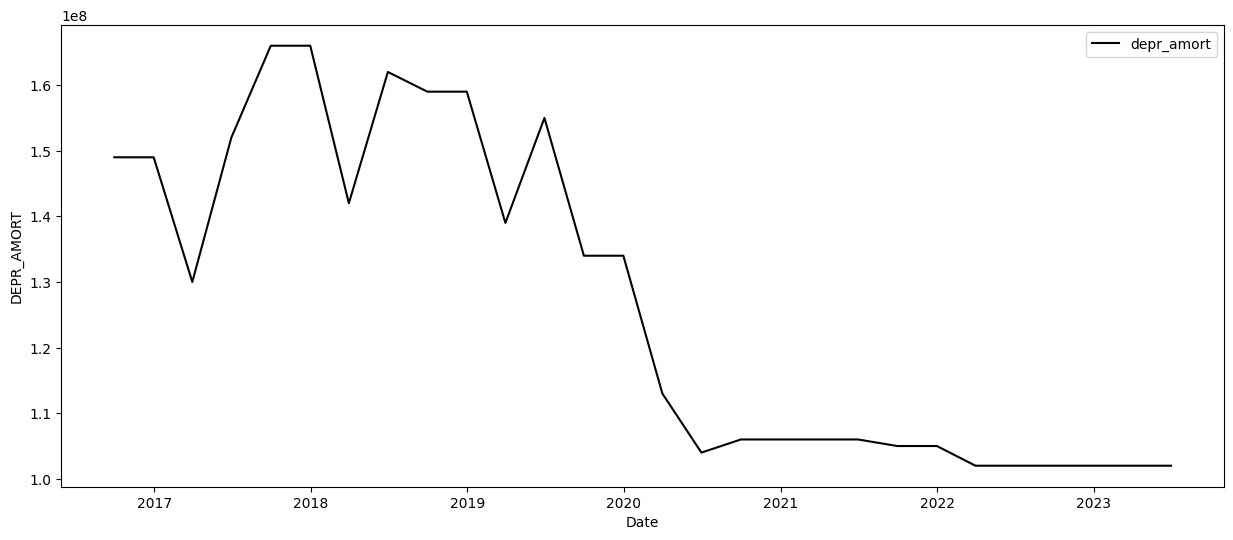

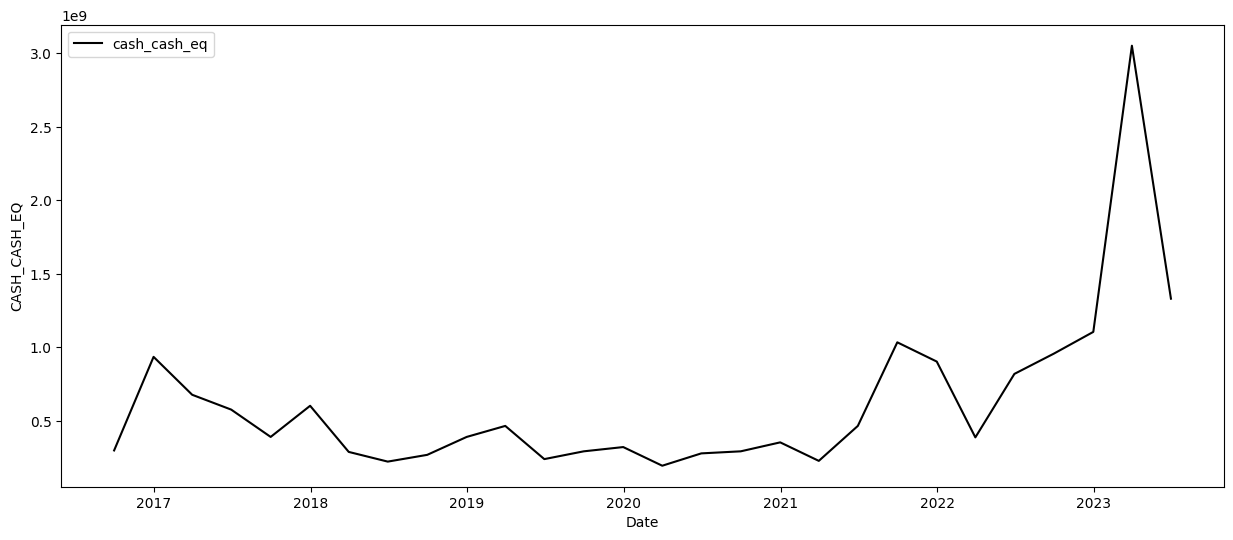

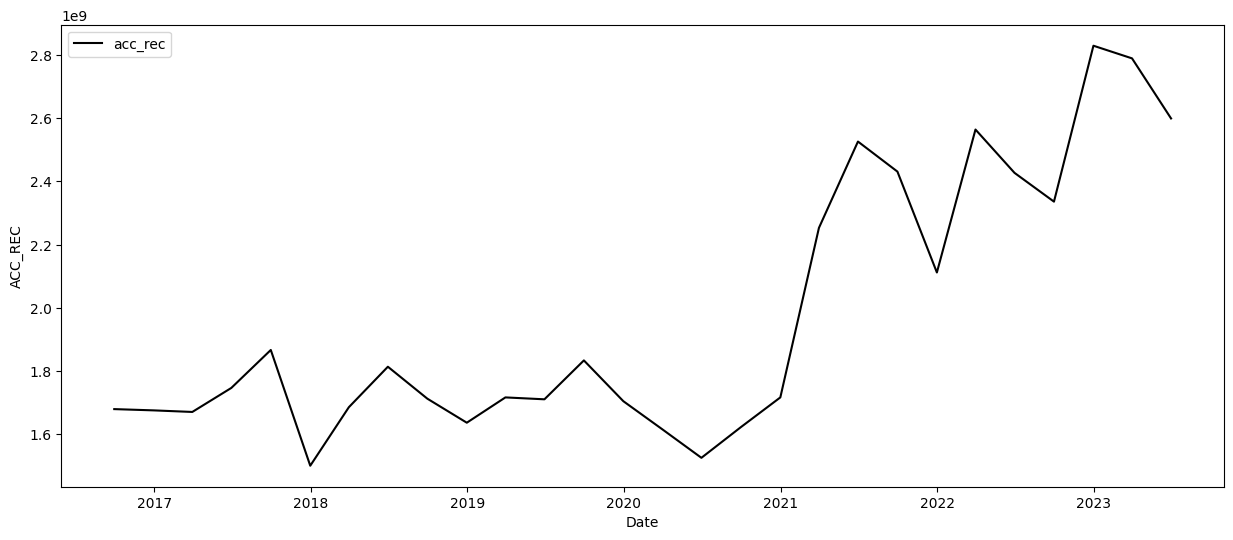

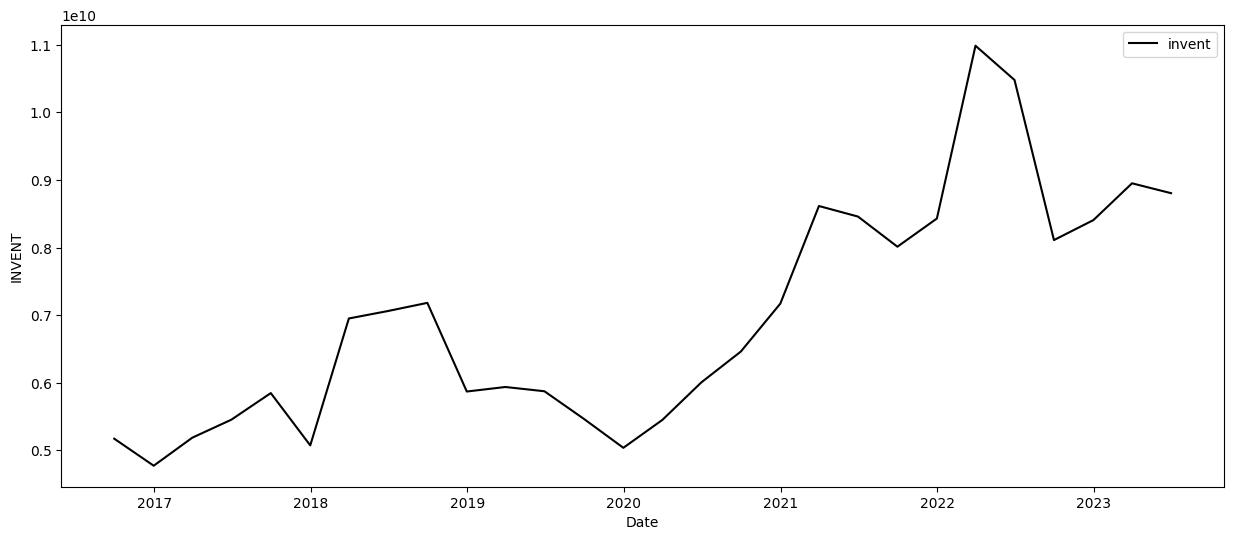

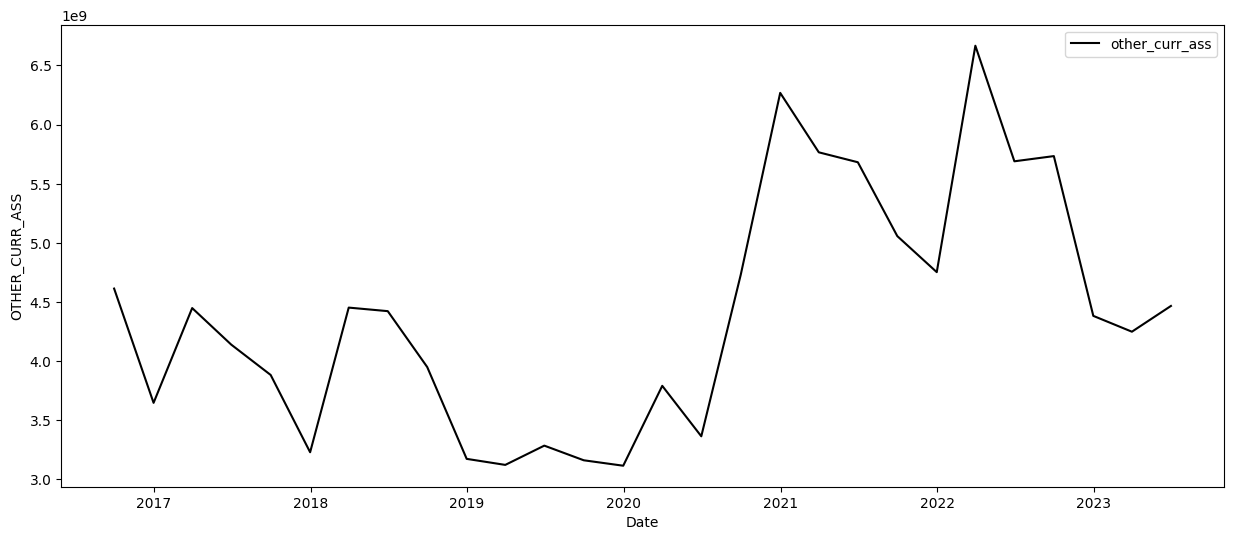

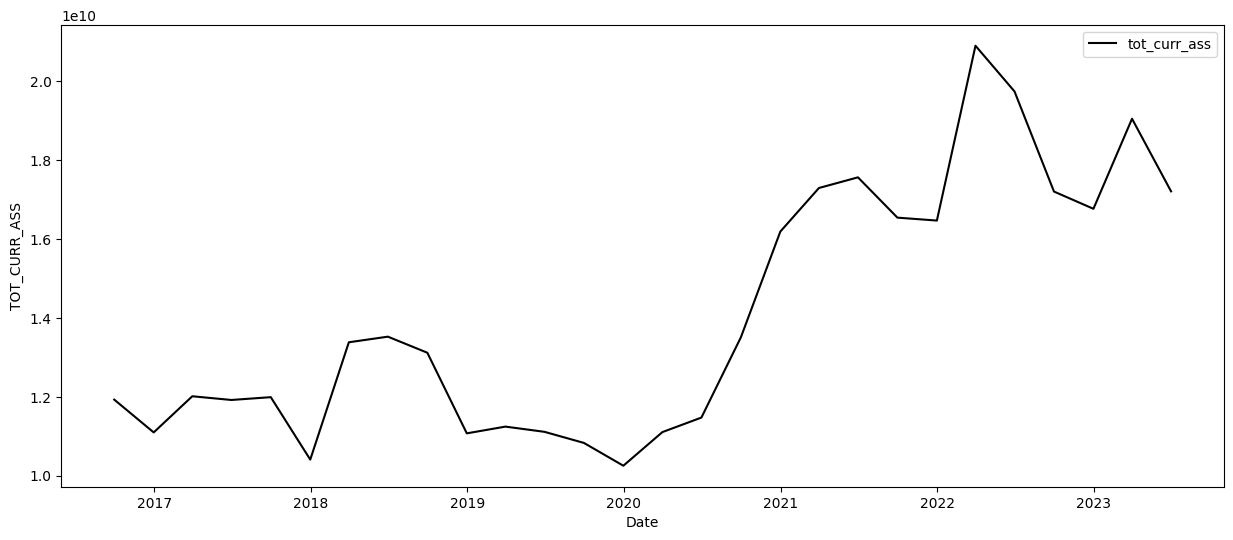

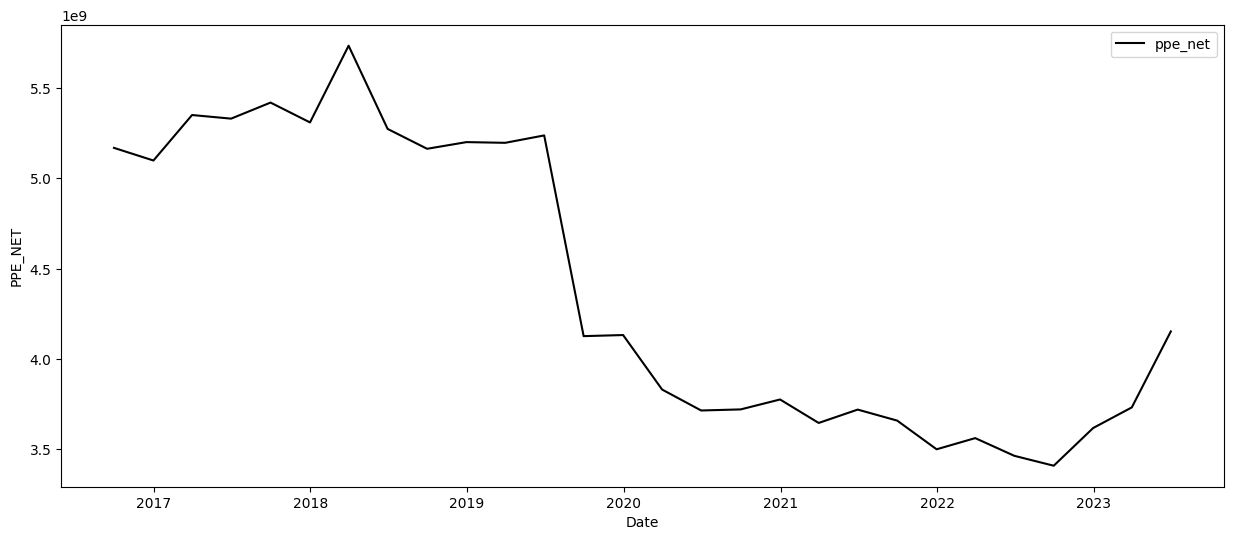

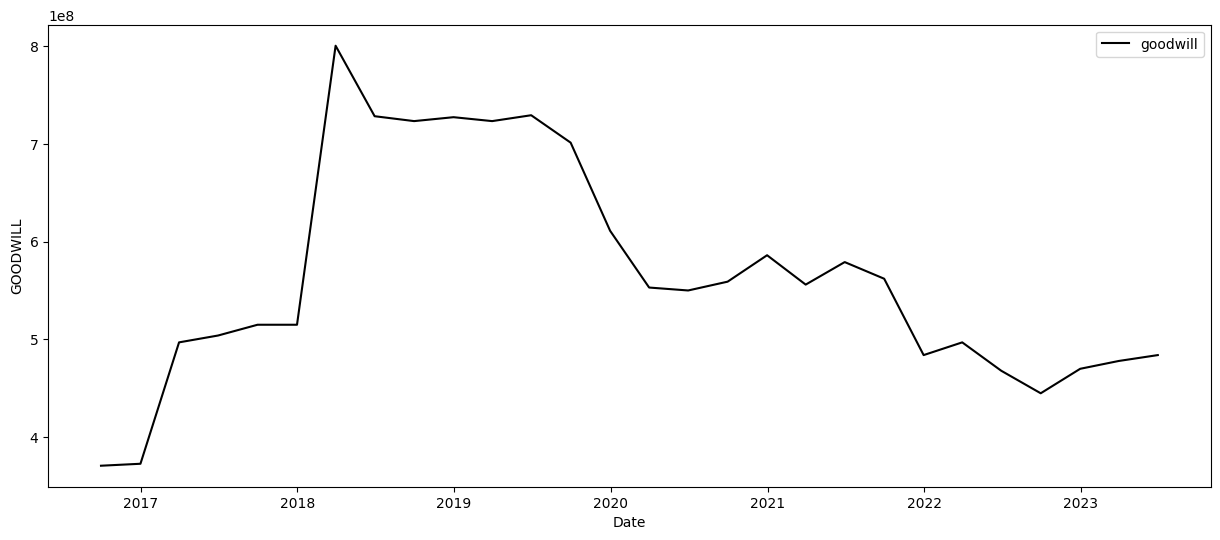

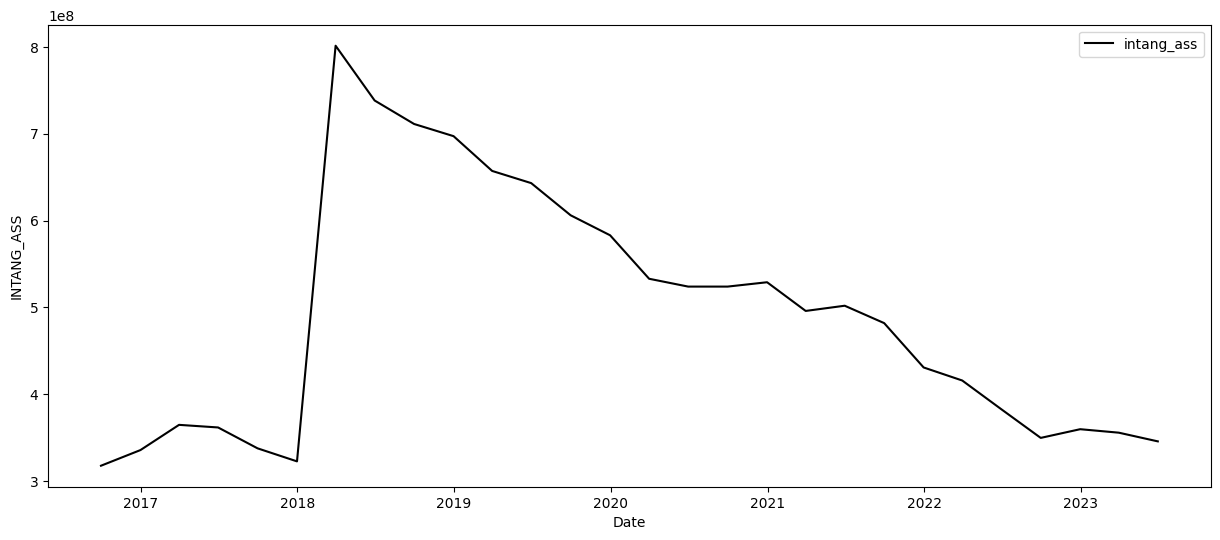

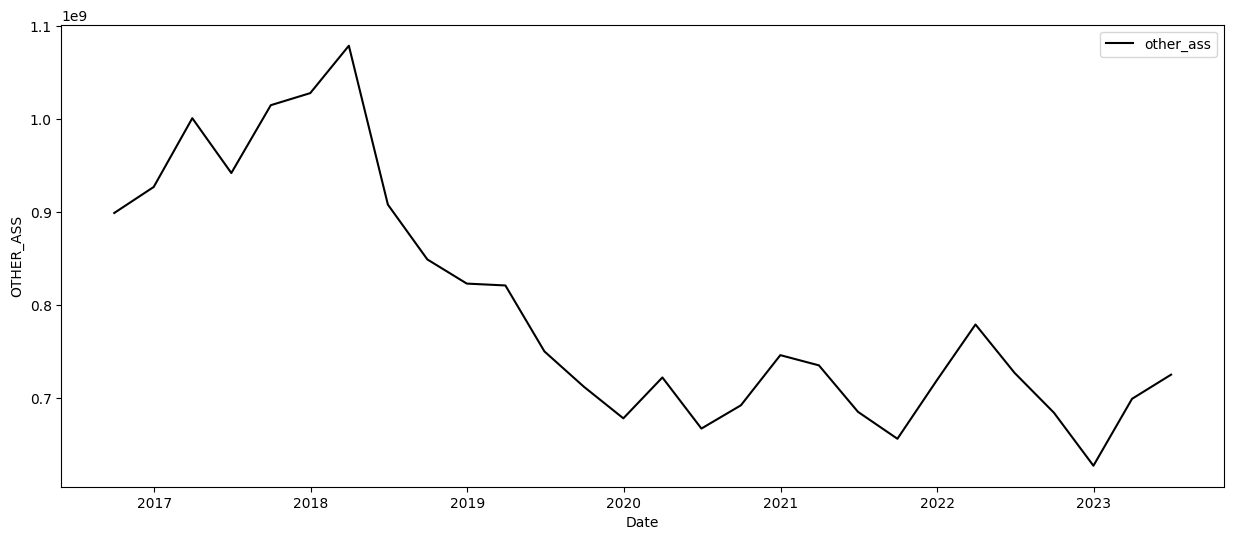

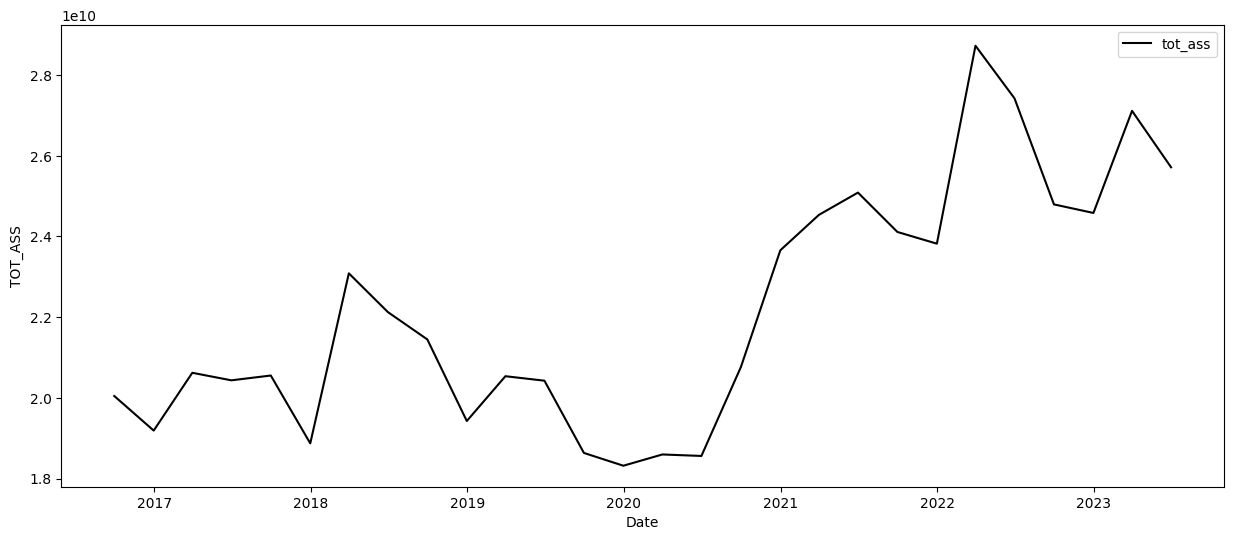

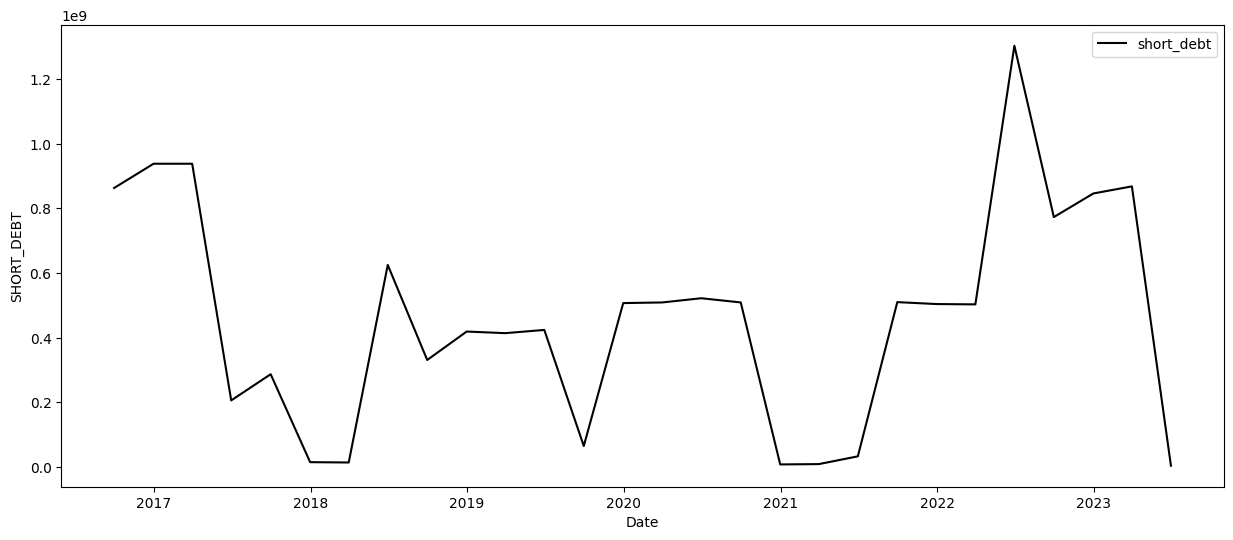

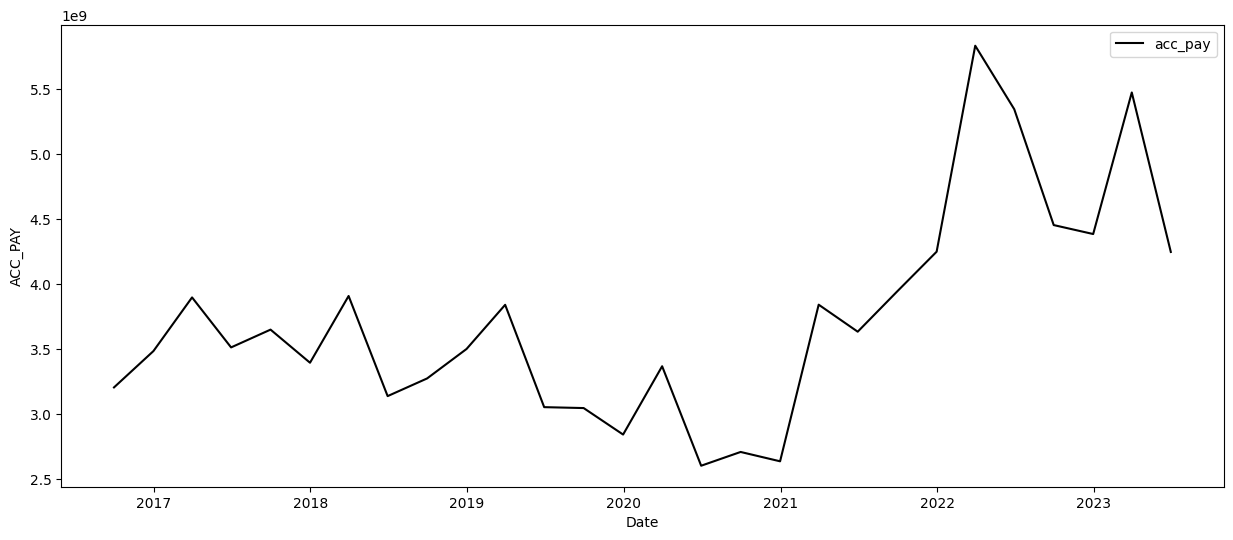

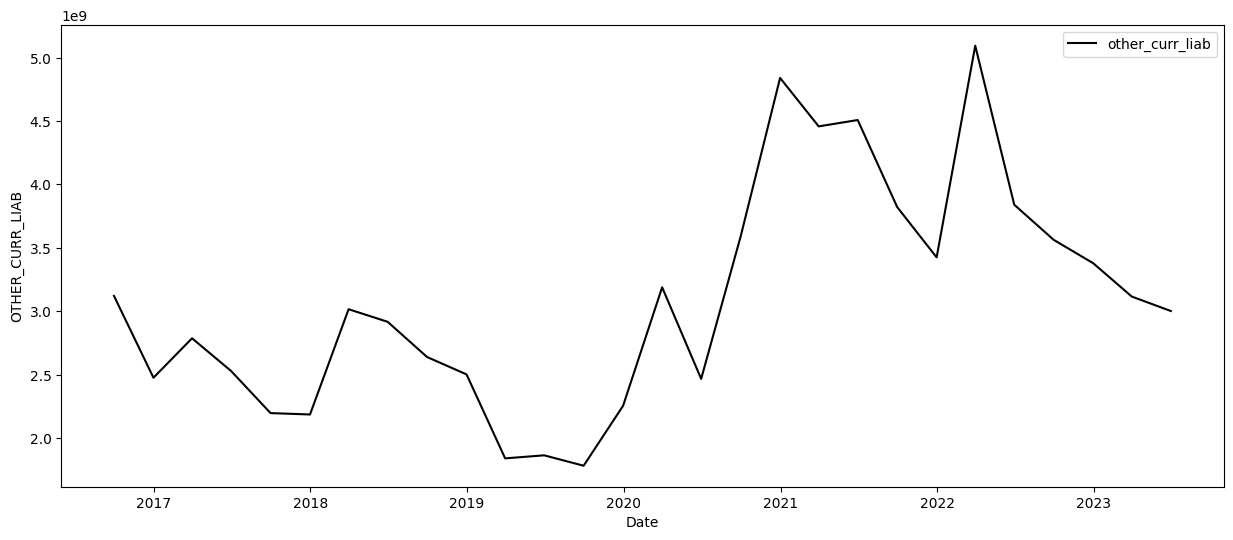

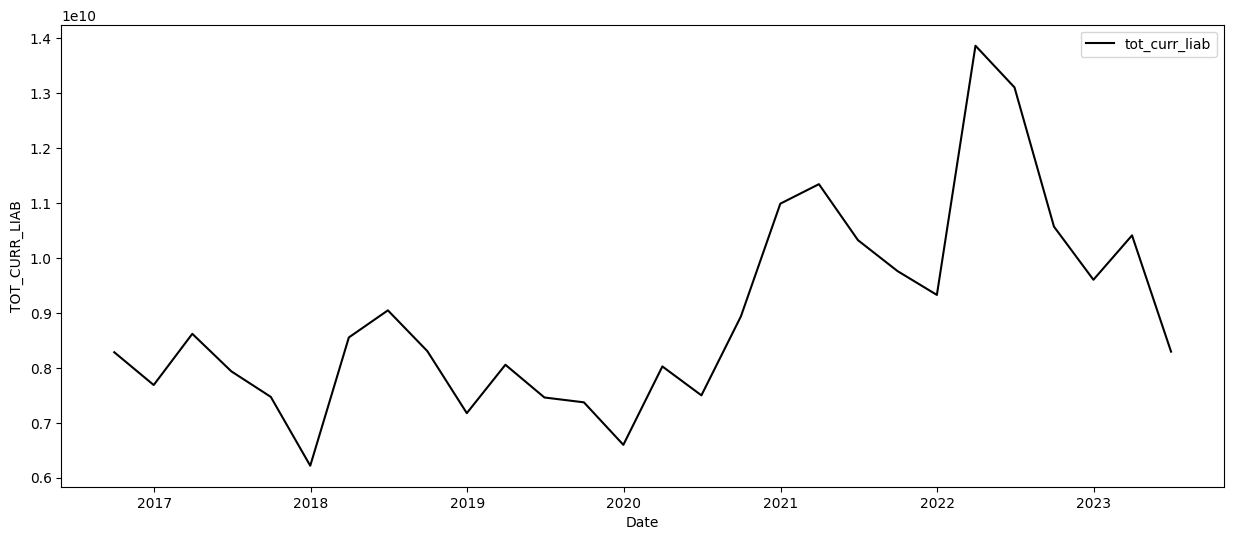

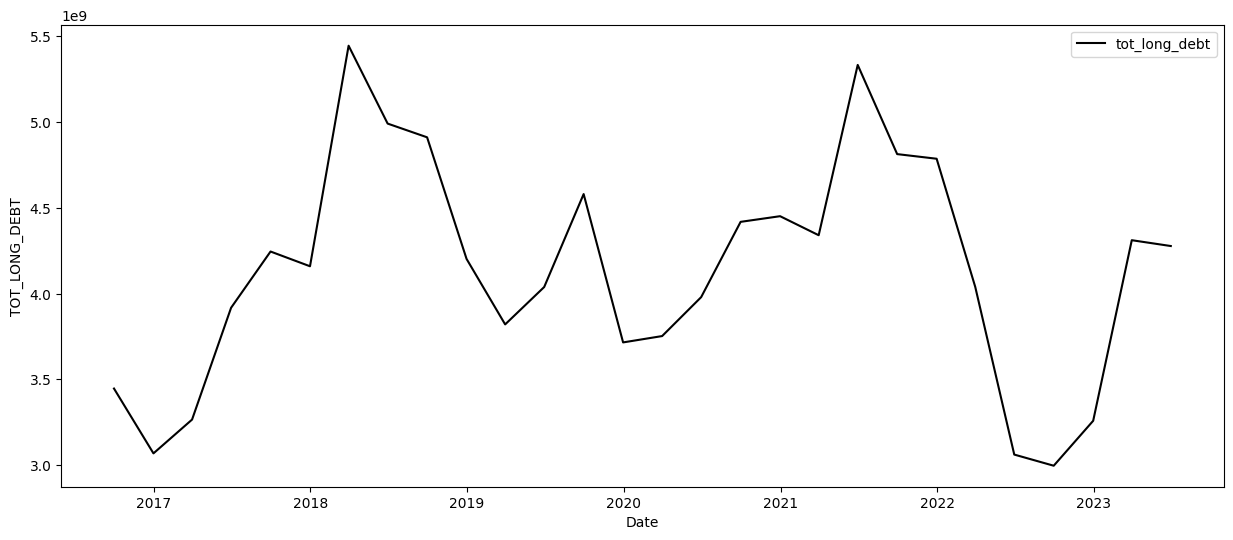

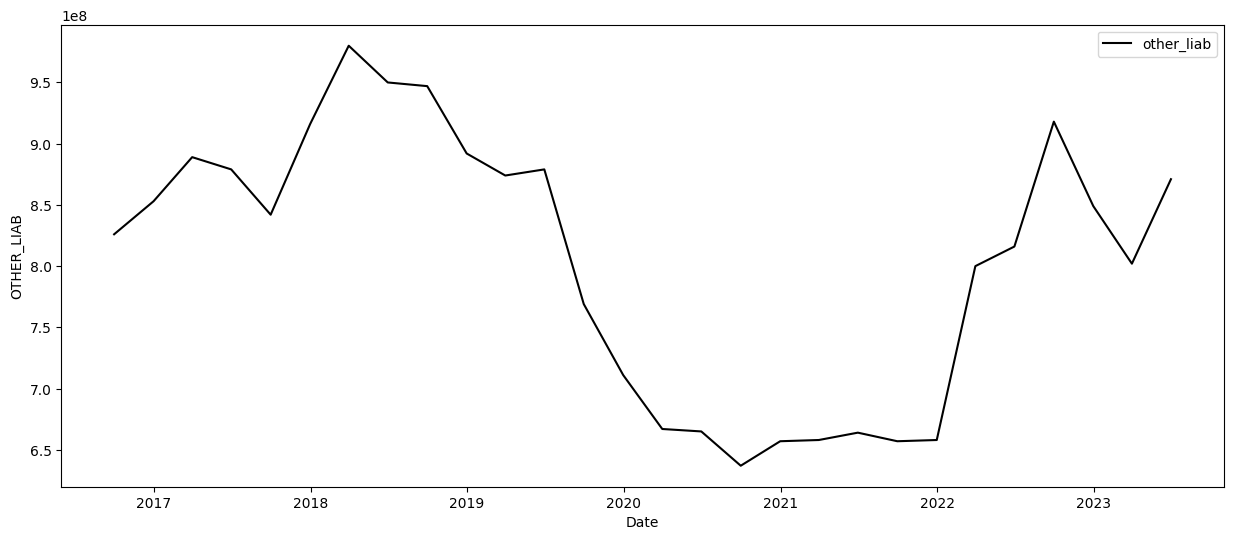

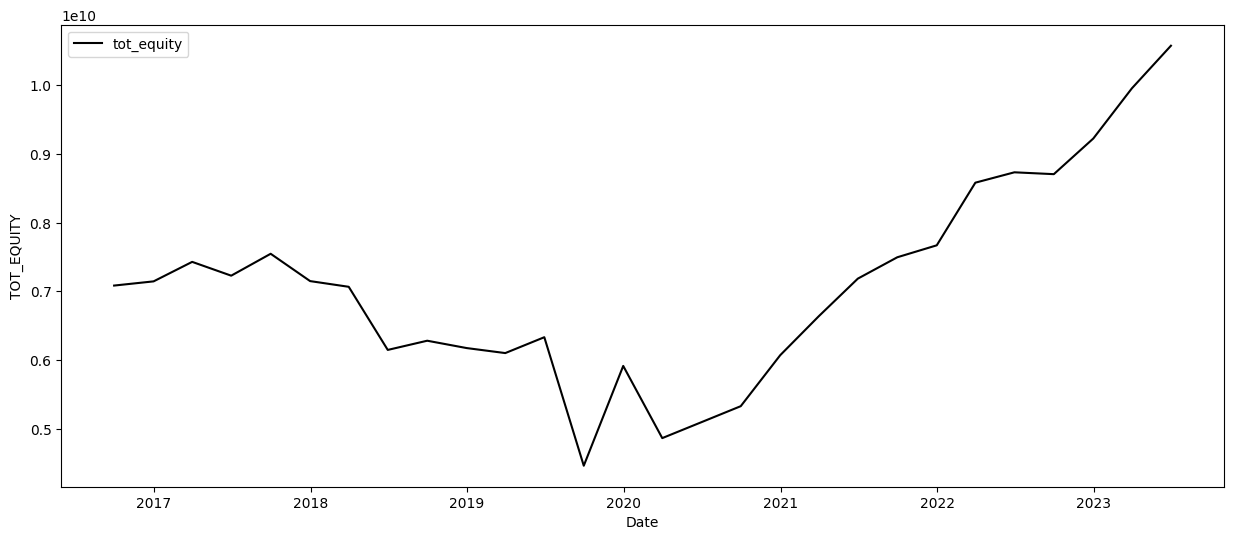

In [5]:
# for column in data_filt.columns[4:]:
#         fig, ax1 = plt.subplots(figsize=(15, 6))

#         ax1.plot(data_filt['end'], data_filt[column], color='k', label=column)

#         ax1.set_xlabel('Date')
#         ax1.set_ylabel(column.upper())
        
#         plt.legend()
#         plt.show()